In [1]:
import os
import pacmap
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE

In [24]:
PATH_CSV = './top_3827348_songs.csv'
PATH_CSV_CLEAN = './clean_top_3827348_songs.csv'
SAMPLE_SIZE = 2500
SEED = 42
MAX_TRACK_NAME_LENGTH = 20

In [3]:
def to_str(x):
    return x[2:-1]

def to_list(x):
    return [y for y in to_str(x).split(',')]

if os.path.exists(PATH_CSV_CLEAN):
    df_complete = pd.read_csv(PATH_CSV_CLEAN)
else:
    df_complete = pd.read_csv(
        PATH_CSV,
        usecols=[
            'id', 'name', 'duration', 'explicit', 'popularity', 'loudness', 'tempo',
            'time_signature', 'key', 'mode', 'acousticness', 'danceability',
            'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence'
        ],
        converters={
            'id': to_str, 'name': to_str, 'duration': np.int32, 'explicit': np.int32,
            'popularity': np.int32, 'loudness': np.float32, 'tempo': np.float32,
            'time_signature': np.int32, 'key': np.int32, 'mode': np.int32, 'acousticness': np.float32,
            'danceability': np.float32, 'energy': np.float32, 'instrumentalness': np.float32,
            'liveness': np.float32, 'speechiness': np.float32, 'valence': np.float32
        }
    )
    df_complete.to_csv(PATH_CSV_CLEAN)

In [25]:
if SAMPLE_SIZE is not None:
    df = df_complete.sample(n=SAMPLE_SIZE, random_state=SEED)
else:
    df = df_complete
df.head()

,id,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
3072867,6FuyilWWJGDOvMOlh8JQZ1,Seeri Koko,393626,0,6,-4.842000,80.941002,4,9,1,0.77900,0.577,0.6750,0.130000,0.1340,0.0447,0.6440
3430594,6z2eZXvYpk0tiMpuGhpflm,"Let Me Try Again - Live At The Spectrum, Philadelphia, Pennsylvania / October 7, 1974",203933,0,27,-7.684000,87.900002,4,10,1,0.45200,0.235,0.7100,0.000002,0.8710,0.1750,0.4730
1932479,3volPSxBG1F2Y187cQxNXk,Hole in the Sky,282600,0,1,-23.631001,78.348999,3,2,1,0.81100,0.152,0.0778,0.973000,0.0773,0.0470,0.0343
2803918,5hyUY4nKnD62yiLkBpMwfr,Ego,252960,0,18,-7.867000,133.962997,4,2,1,0.00993,0.717,0.8020,0.008530,0.0666,0.0482,0.8850
3025078,69tB6fMwLUk88FkIruNQsY,La Ni\xc3\xb1a De Guatemala,209240,0,25,-18.306000,86.809998,4,9,0,0.93600,0.488,0.0602,0.000039,0.1150,0.0786,0.1400


In [26]:
selected_cols = [
    'acousticness', 'danceability', 'duration',
    'energy', 'explicit', 'instrumentalness', 'key',
    'liveness', 'loudness', 'mode', 'speechiness',
    'tempo', 'time_signature', 'valence'
]
scaler = StandardScaler()
X_selected = scaler.fit_transform(df[selected_cols])

In [27]:
colors = MinMaxScaler().fit_transform(df[['popularity']])

In [28]:
pca_music = PCA(n_components=2, random_state=SEED).fit(X_selected)
X_music_pca = pca_music.transform(X_selected)

In [29]:
pca_music.explained_variance_

array([3.24703832, 1.51002967])

In [30]:
pca_music.explained_variance_ratio_

array([0.23183854, 0.10781612])

In [31]:
pd.DataFrame(
    pca_music.components_.T.round(3),
    index=selected_cols,
    columns=['PCA1', 'PCA2']
)

,PCA1,PCA2
acousticness,0.418,0.299
danceability,-0.310,0.376
duration,0.048,-0.361
energy,-0.469,-0.264
explicit,-0.141,0.288
instrumentalness,0.291,-0.257
key,-0.039,0.003
liveness,-0.080,0.087
loudness,-0.473,-0.186
mode,0.029,0.045


In [32]:
row_numbers = df.index[df['name'] == 'Dance (A$$)'].tolist()
row_numbers

[]

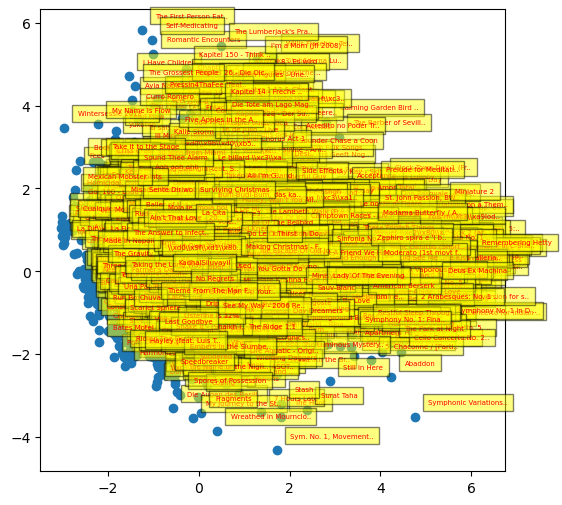

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X_music_pca[:, 0], X_music_pca[:, 1])
for i in range(X_music_pca.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=X_music_pca[i, 0] + 0.3,
        y=X_music_pca[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

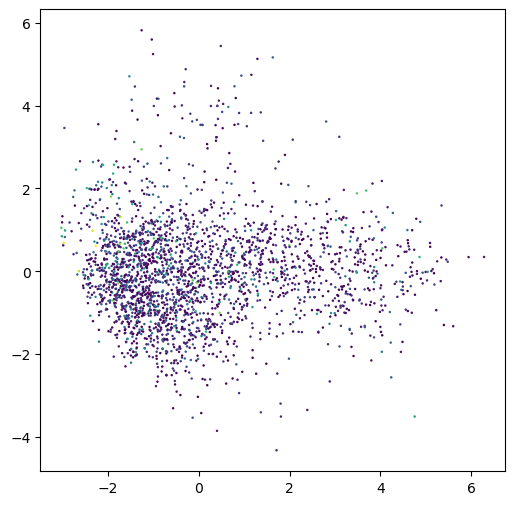

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    X_music_pca[:, 0],
    X_music_pca[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [35]:
target_name = 'Dance (A$$)'
row = df[df['name'] == target_name]
row

,id,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence


In [36]:
tsne = TSNE(verbose=1, random_state=SEED)
tsne_results = tsne.fit_transform(X_selected)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.002s...
[t-SNE] Computed neighbors for 2500 samples in 0.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 1.017482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.480133
[t-SNE] KL divergence after 1000 iterations: 1.381316


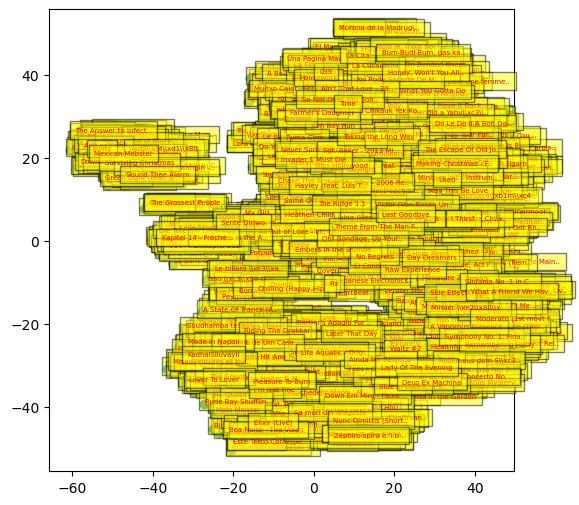

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
for i in range(tsne_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=tsne_results[i, 0] + 0.3,
        y=tsne_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

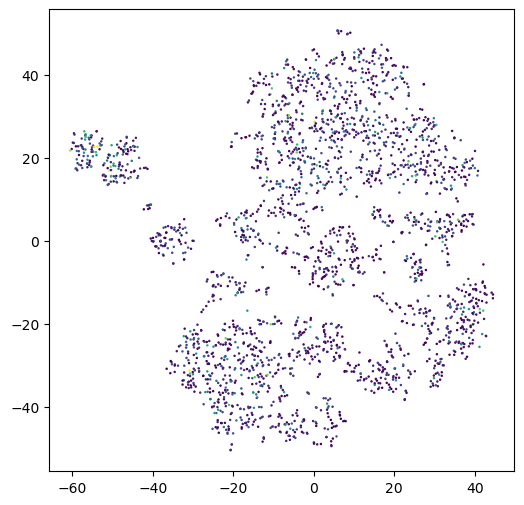

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [39]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=SEED)
pacmap_results = embedding.fit_transform(X_selected, init='pca')

/Users/jozef/Documents/Data Science/Data-Science-Project/.conda/lib/python3.12/site-packages/pacmap/pacmap.py:828: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


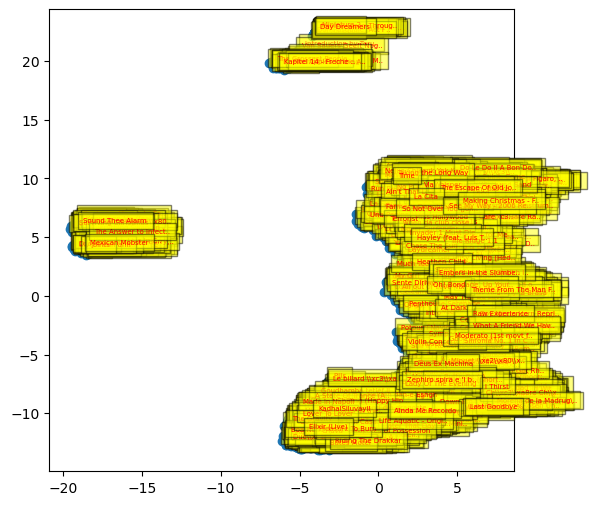

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(pacmap_results[:, 0], pacmap_results[:, 1])
for i in range(pacmap_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=pacmap_results[i, 0] + 0.3,
        y=pacmap_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

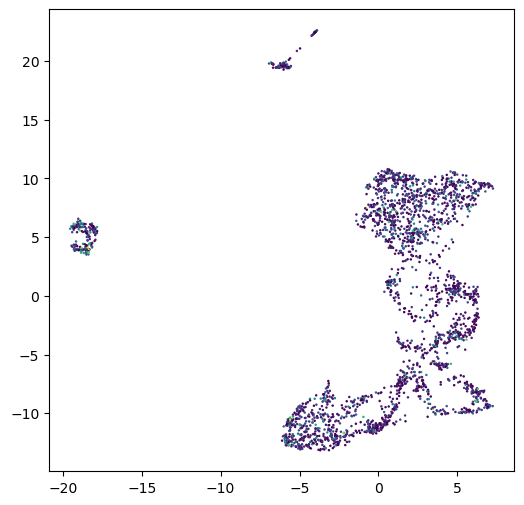

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    pacmap_results[:, 0],
    pacmap_results[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [42]:
brc = Birch(n_clusters=None).fit(X_selected)
brc_results = brc.transform(X_selected)

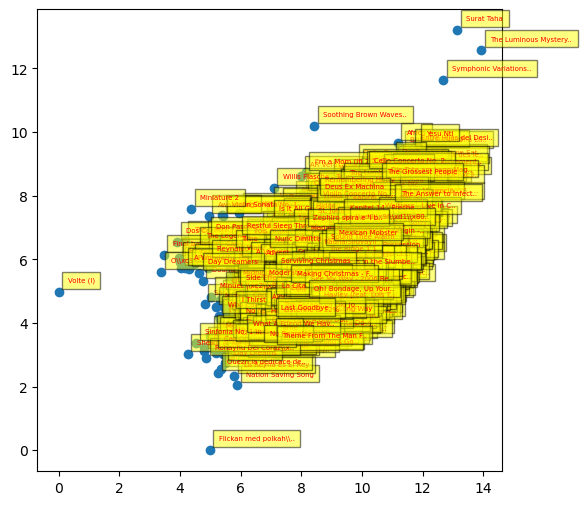

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(brc_results[:, 0], brc_results[:, 1])
for i in range(brc_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=brc_results[i, 0] + 0.3,
        y=brc_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

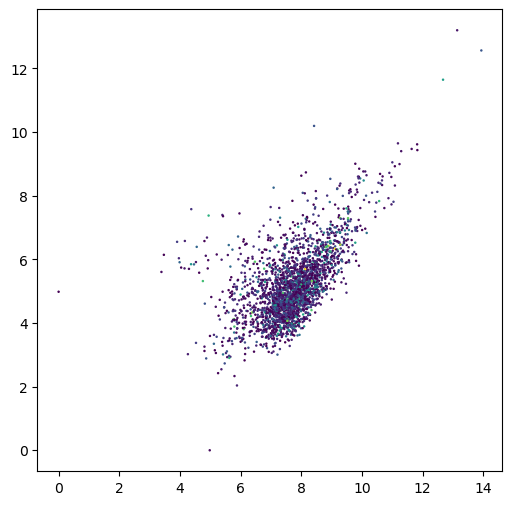

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    brc_results[:, 0],
    brc_results[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)